In [ ]:
import tensorflow as tf
print(tf.__version__)


2.5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<H1> First order differential equasion </H1>


$$
y'(x) = f(x, y(x))
$$

Let's solve following equasion:

$$
y'=12x^2-4x-1
$$
$$
y(0) = 1
$$

The analitical solution to this is:


$$
y = 4x^3 - 2 x^2 - x + 1
$$

Neural network needs some layers and neurons.

We will use 2 hidden layers and 32 neurons in each layer.

In [ ]:
f0 = 1
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.001
training_steps = 1000
batch_size = 100
display_step = 50
# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons
weights = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_output]))
}
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

To compute function y using neural network we will use:
$$
y(x) = x_0 + xNN(x)
$$

In [ ]:
# Create model
def multilayer_perceptron(x):
  x = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2, weights['out']) + biases['out']
  return output
# Universal Approximator
def g(x):
  return x * multilayer_perceptron(x) + f0
# Given ODE
def f(x):
  return 12*x**2 - 4*x - 1
# Custom loss function to approximate the derivatives
def custom_loss():
  summation = []
  for x in np.linspace(-1,1,batch_size):
    dNN = (g(x+inf_s)-g(x))/inf_s
    summation.append((dNN - f(x))**2)
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

$$\frac{dg(x)}{x} = \frac{g(x+n)-g(x)}{n},$$
$$lim_{n\to0}$$

In [ ]:
def train_step():
  with tf.GradientTape() as tape:
    loss = custom_loss()
  trainable_variables=list(weights.values())+list(biases.values())
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))
# Training the Model:
for i in range(1, training_steps+1):
  train_step()
  if i == 1 or i % display_step == 0:
    print("loss after", i, "steps: %f " % (custom_loss()))

loss after 1 steps: 4.811338 
loss after 50 steps: 3.394367 
loss after 100 steps: 2.887211 
loss after 150 steps: 2.438566 
loss after 200 steps: 2.068438 
loss after 250 steps: 1.741415 
loss after 300 steps: 1.447946 
loss after 350 steps: 1.189064 
loss after 400 steps: 0.966678 
loss after 450 steps: 0.784323 
loss after 500 steps: 0.640788 
loss after 550 steps: 0.532233 
loss after 600 steps: 0.448486 
loss after 650 steps: 0.382113 
loss after 700 steps: 0.328381 
loss after 750 steps: 0.284864 
loss after 800 steps: 0.250407 
loss after 850 steps: 0.223902 
loss after 900 steps: 0.203100 
loss after 950 steps: 0.186906 
loss after 1000 steps: 0.174105 


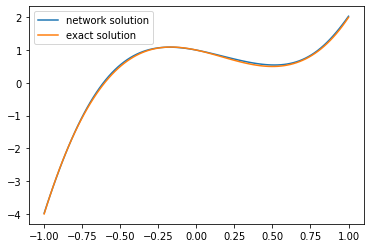

In [ ]:
# True Solution (found analitically)
def true_solution(x):
  return 4*x**3 - 2*x**2 - x + 1
X = np.linspace(-1, 1, batch_size)
result = []
for i in X:
  result.append(g(i).numpy()[0][0][0])
S = true_solution(X)
plt.plot(X, result, label="network solution")
plt.plot(X, S, label="exact solution")
plt.legend()
plt.show()

<H1> Second order differential equasion </H1>


$$
\Psi''(x) = f(x, \Psi(x), \Psi'(x))
$$

Let's solve following equasion:

$$
\frac{ \delta^{2}y }{ \delta x^{2}}+2
{\frac{\delta y}{\delta x} }+{ 3y } = x
$$
$$
y(0) = 2 = A
$$
$$
y'(0) = 3 = B
$$

The anlitical solution to this is:


$$
y(x) = \frac{1}{9}e^{-x}(e^x(3x+2) + 22\sqrt{2}\sin{(\sqrt{2}x)} + 20\cos{(\sqrt{2}x)})
$$

In [ ]:
learning_rate = 0.001
training_steps = 200
batch_size = 100
display_step = training_steps/20
eps = inf_s

In [ ]:
A = 2
B = 3

Network was modified. Now has 3 hidden layers and 256 neurons in each layer.

In [ ]:
n_input = 1     # input layer number of neurons
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_hidden_3 = 256 # 3rd layer number of neurons
n_output = 1    # output layer number of neurons
weights_2 = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'h3': tf.Variable(tf.random.normal([n_hidden_2, n_hidden_3])),
'out': tf.Variable(tf.random.normal([n_hidden_3, n_output]))
}
biases_2 = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'b3': tf.Variable(tf.random.normal([n_hidden_3])),
'out': tf.Variable(tf.random.normal([n_output]))
}

In [ ]:
# Create model
def multilayer_perceptron_2(x):
  X = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(X, weights_2['h1']), biases_2['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights_2['h2']), biases_2['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  layer_3 = tf.add(tf.matmul(layer_2, weights_2['h3']), biases_2['b3'])
  layer_3 = tf.nn.sigmoid(layer_3)
  output = tf.matmul(layer_3, weights_2['out']) + biases_2['out']
  return output

Our function y(x) has a solution given by this formula:
$$
y(x) = A + Bx + x^2NN(x)
$$

In [ ]:
def neural_y(x):
  return A + B*x + x**2*multilayer_perceptron_2(x)

Cost function to be minimized is:
$$
Cost = \sum_{i}{(\Psi''(x_i) - f(x_i, \Psi(x_i), \Psi'(x_i)))^2}
$$
In our equation it comes to:
$$
Cost = \sum_{i}{(y''(x_i) + 2y'(x_i) + 3y(x_i) - x_i)^2}
$$

In [ ]:
def second_order_loss():
  summation = []
  for x in np.linspace(-1,1,batch_size):
    y = neural_y(x)
    dy = (neural_y(x+eps) - neural_y(x))/eps
    ddy = (neural_y(x+eps) - 2*neural_y(x) + neural_y(x-eps))/(eps**2)
    value = (ddy+2*dy+3*y-x)**2
    summation.append((ddy+2*dy+3*y-x)**2)
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

In [ ]:
def train_step_second_order():
  with tf.GradientTape() as tape:
    loss = second_order_loss()
  trainable_variables_2 = list(weights_2.values())+list(biases_2.values())
  gradients = tape.gradient(loss, trainable_variables_2)
  optimizer.apply_gradients(zip(gradients, trainable_variables_2))

In [ ]:
for i in range(1, training_steps+1):
  train_step_second_order()
  if i == 1 or i % display_step == 0:
    print("loss after", i, "steps: %f " % (second_order_loss()))

loss after 1 steps: 48.478119 
loss after 10 steps: 25.948601 
loss after 20 steps: 20.758736 
loss after 30 steps: 20.387131 
loss after 40 steps: 20.238953 
loss after 50 steps: 14.576778 
loss after 60 steps: 15.093274 
loss after 70 steps: 17.512863 
loss after 80 steps: 15.178745 
loss after 90 steps: 15.881549 
loss after 100 steps: 14.539656 
loss after 110 steps: 16.634329 
loss after 120 steps: 18.904982 
loss after 130 steps: 15.479137 
loss after 140 steps: 14.244158 
loss after 150 steps: 13.061653 
loss after 160 steps: 18.129345 
loss after 170 steps: 13.583634 
loss after 180 steps: 13.593352 
loss after 190 steps: 15.731951 
loss after 200 steps: 13.990321 


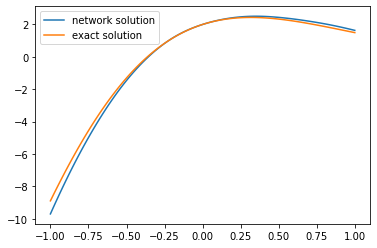

In [ ]:
# True Solution (found analitically)
def true_solution(x):
  return (np.exp(-1*x)*(np.exp(x)*(3*x-2) + 22*np.sqrt(2)*np.sin(np.sqrt(2)*x) + 20*np.cos(np.sqrt(2)*x)))/9
X = np.linspace(-1, 1, batch_size)
result = []
for i in X:
  result.append(neural_y(i).numpy()[0][0][0])
S = true_solution(X)
plt.plot(X, result, label="network solution")
plt.plot(X, S, label="exact solution")
plt.legend()
plt.show()

Sources: <br>
- https://stats.stackexchange.com/questions/493558/on-solving-ode-pde-with-neural-networks <br>
- https://arxiv.org/abs/physics/9705023 <br>
- https://towardsdatascience.com/using-neural-networks-to-solve-ordinary-differential-equations-a7806de99cdd <br>
- https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c?fbclid=IwAR0IW0-qng2mQm1Du7Ex0CcSL6zvRoSn86LS0FQLeoVuULWsXD5_S_WkVMU#:~:text=%20Neural%20networks%20for%20solving%20differential%20equations%20,instability%20of%20calculations...%204%20Conclusions.%20%20More%20
- https://bulldogjob.pl/articles/1136-czym-jest-deep-learning-i-sieci-neuronowe